# PROBLEM SET 3
### Name - Mandeep Singh Sawhney
### Student id - 200557021

## Question1

## Step 1. Importing libraries

In [1]:
#step 1
import pandas as pd
import io
import requests

## Step 2 & 3. Import the dataset from the address.Step 3. Assign it to a variable called users

In [2]:
#step 2 and 3
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
download = requests.get(url).content
users = pd.read_csv(io.StringIO(download.decode('utf-8')), sep='|')

## Step 4 - Discover what is the mean age per occupation 

In [3]:
#step 4
mean_age_per_occupation = users.groupby('occupation')['age'].mean().reset_index()


mean_age_per_occupation.columns = ['occupation', 'mean_age']

print(mean_age_per_occupation)

       occupation   mean_age
0   administrator  38.746835
1          artist  31.392857
2          doctor  43.571429
3        educator  42.010526
4        engineer  36.388060
5   entertainment  29.222222
6       executive  38.718750
7      healthcare  41.562500
8       homemaker  32.571429
9          lawyer  36.750000
10      librarian  40.000000
11      marketing  37.615385
12           none  26.555556
13          other  34.523810
14     programmer  33.121212
15        retired  63.071429
16       salesman  35.666667
17      scientist  35.548387
18        student  22.081633
19     technician  33.148148
20         writer  36.311111


## Step 5. Discover the Male ratio per occupation and sort it from the most to the least
 

In [4]:
#step5
occupations = users.groupby('occupation')['gender'].value_counts(normalize=True).unstack()

# Taking the ratio of males
occupations['M_ratio'] = occupations['M'] / (occupations['M'] + occupations['F'])

# Sorting it by male ratio in descending order
occupations = occupations.sort_values('M_ratio', ascending=False)

print(occupations)

gender                F         M   M_ratio
occupation                                 
engineer       0.029851  0.970149  0.970149
technician     0.037037  0.962963  0.962963
retired        0.071429  0.928571  0.928571
programmer     0.090909  0.909091  0.909091
executive      0.093750  0.906250  0.906250
scientist      0.096774  0.903226  0.903226
entertainment  0.111111  0.888889  0.888889
lawyer         0.166667  0.833333  0.833333
salesman       0.250000  0.750000  0.750000
educator       0.273684  0.726316  0.726316
student        0.306122  0.693878  0.693878
other          0.342857  0.657143  0.657143
marketing      0.384615  0.615385  0.615385
writer         0.422222  0.577778  0.577778
none           0.444444  0.555556  0.555556
administrator  0.455696  0.544304  0.544304
artist         0.464286  0.535714  0.535714
librarian      0.568627  0.431373  0.431373
healthcare     0.687500  0.312500  0.312500
homemaker      0.857143  0.142857  0.142857
doctor              NaN  1.00000

## Step 6. For each occupation, calculate the minimum and maximum ages


In [5]:
#step 6
# Grouping it by occupation
grouped = users.groupby('occupation')

# Applying min and max functions on age column
result = grouped['age'].agg(['min', 'max'])

# Print results
print(result)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


## Step 7. For each combination of occupation and sex, calculate the mean age


In [6]:
#step 7
grouped = users.groupby(['occupation', 'gender'])

# Calculate the mean age
mean_ages = grouped['age'].mean()

# Print results 
print(mean_ages)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

## Step 8. For each occupation present the percentage of women and men


In [7]:
#step 8

# Create column for gender (M/F)
users['gender'] = users['gender'].map({'M': 'Male', 'F': 'Female'})

# Groupby occupation and gender, count rows
counts = users.groupby(['occupation', 'gender'])['user_id'].count().reset_index(name='count')

# Pivot table to reshape the data
table = pd.pivot_table(counts, values='count', index='occupation', 
                       columns='gender', aggfunc=sum, fill_value=0)

# Calculate percentage of each gender per occupation 
table['Female'] = table['Female'] / (table['Male'] + table['Female']) 
table['Male'] = table['Male'] / (table['Male'] + table['Female'])

# Multiply by 100 and add % symbol
table['Female'] = round(table['Female'] * 100, 2).astype(str) + '%'  
table['Male'] = round(table['Male'] * 100, 2).astype(str) + '%'

# Print table
print(table)

gender         Female    Male
occupation                   
administrator  45.57%  98.95%
artist         46.43%   97.0%
doctor           0.0%  100.0%
educator       27.37%   99.6%
engineer        2.99%  99.95%
entertainment  11.11%  99.31%
executive       9.38%  99.68%
healthcare     68.75%  87.91%
homemaker      85.71%  53.85%
lawyer         16.67%  98.36%
librarian      56.86%  97.48%
marketing      38.46%  97.65%
none           44.44%  91.84%
other          34.29%  99.51%
programmer      9.09%  99.85%
retired         7.14%  99.45%
salesman        25.0%   97.3%
scientist       9.68%  99.66%
student        30.61%  99.78%
technician       3.7%  99.86%
writer         42.22%   98.4%


## Question 2

## importing the dataset

In [8]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
print(euro12.head(len(euro12)))

                   Team  Goals  Shots on target  Shots off target   
0               Croatia      4               13                12  \
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

## Step 4 Select only the Goal column

In [9]:
goals = euro12['Goals']
print(goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


## Step 5. How many team participated in the Euro2012?

In [10]:
num_teams = len(euro12['Team'].unique())

print('Number of teams participated in Euro2012: ' + str(num_teams))

Number of teams participated in Euro2012: 16


## Step 6. What is the number of columns in the dataset?

In [11]:
num_cols = len(euro12.columns)
print('Number of columns in Euro2012: ' + str(num_cols))

Number of columns in Euro2012: 35


## Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [41]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


## Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [42]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

print(discipline)

                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


## Step 9. Calculate the mean Yellow Cards given per Team

In [12]:
yellowcard = euro12[['Team', 'Yellow Cards']]

means = yellowcard.groupby('Team')['Yellow Cards'].agg('mean')

print(means)

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


## Step 10. Filter teams that scored more than 6 goals

In [45]:
# Filter for teams with more than 6 goals 
df_goals = euro12[euro12['Goals'] > 6]

print(df_goals['Team'].to_string(index=True))

5     Germany
13      Spain


## Step 11. Select the teams that start with G.


In [10]:
g_teams = euro12.iloc[euro12[euro12['Team'].str.startswith('G')].index]
print(g_teams)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy   
5  Germany     10               32                32             47.8%  \
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals   
5            15.6%                          80             2              1  \
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won   
5                     0  ...          10                 62.6%         63  \
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off   
5             49        12             4          0       15        15  \
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


## Step 12. Select the first 7 columns


In [18]:
first_7 = euro12.iloc[:, list(range(7))]
print(first_7)

                   Team  Goals  Shots on target  Shots off target   
0               Croatia      4               13                12  \
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

## Step 13. Select all columns except the last 3

In [20]:
# Select first n-3 columns 
cols = euro12.iloc[:, :len(euro12.columns)-3]
print(cols)

                   Team  Goals  Shots on target  Shots off target   
0               Croatia      4               13                12  \
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

## Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [21]:
acc = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

print(acc)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


## Question 3

## Step 1 Import the necessary libraries

In [24]:
import random

## Step 2. Create 3 differents Series, each of length 100, as follows:• The first a random number from 1 to 4 • The second a random number from 1 to 3 • The third a random number from 10,000 to 30,000

In [29]:
series1 = pd.Series([random.randint(1,4) for _ in range(100)])
series2 = pd.Series([random.randint(1,3) for _ in range(100)])
series3 = pd.Series([random.randint(10000,30000) for _ in range(100)])

print('Series of length 100 with random numbers from 1 to 4: ')
print()
print(series1)
print()
print('Series of length 100 with random number from 1 to 3: ')
print()
print(series2)
print()
print('Series of length 100 with random number from 10,000 to 30,000: ')
print()
print(series3)

Series of length 100 with random numbers from 1 to 4: 

0     2
1     1
2     4
3     1
4     1
     ..
95    1
96    3
97    3
98    4
99    1
Length: 100, dtype: int64

Series of length 100 with random number from 1 to 3: 

0     1
1     3
2     2
3     3
4     2
     ..
95    3
96    2
97    3
98    2
99    2
Length: 100, dtype: int64

Series of length 100 with random number from 10,000 to 30,000: 

0     14938
1     16639
2     25325
3     12683
4     23594
      ...  
95    24190
96    18025
97    24446
98    21866
99    11142
Length: 100, dtype: int64


## Step 3. Create a DataFrame by joining the Series by column

In [30]:
series1 = pd.Series([random.randint(1,4) for _ in range(100)]) 
series2 = pd.Series([random.randint(1,3) for _ in range(100)])
series3 = pd.Series([random.randint(10000,30000) for _ in range(100)])

df = pd.DataFrame({
    'Col1': series1,
    'Col2': series2, 
    'Col3': series3
})

print('DataFrame by joining the Series by column: ')
print()
print(df)

DataFrame by joining the Series by column: 

    Col1  Col2   Col3
0      4     1  12416
1      1     2  20549
2      3     3  12674
3      4     3  25136
4      2     3  27075
..   ...   ...    ...
95     1     2  12635
96     1     1  13569
97     3     1  27743
98     3     3  17565
99     2     2  17440

[100 rows x 3 columns]


## Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [31]:
df.rename(columns = {'Col1': 'bedrs', 'Col2': 'bathrs','Col3':'price_sqr_meter'}, inplace = True)
print(df)

    bedrs  bathrs  price_sqr_meter
0       4       1            12416
1       1       2            20549
2       3       3            12674
3       4       3            25136
4       2       3            27075
..    ...     ...              ...
95      1       2            12635
96      1       1            13569
97      3       1            27743
98      3       3            17565
99      2       2            17440

[100 rows x 3 columns]


## Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [32]:
bigcolumn = pd.DataFrame({
    'bigcolumn': pd.concat([series1, series2, series3])  
})

print('DataFrame with the values of the 3 Series: ')
print()
print(bigcolumn)

DataFrame with the values of the 3 Series: 

    bigcolumn
0           4
1           1
2           3
3           4
4           2
..        ...
95      12635
96      13569
97      27743
98      17565
99      17440

[300 rows x 1 columns]


## Step 6. Ops it seems it is going only until index 99. Is it true?

## Yes it is true. This is due to the reason that each original series had 100 elements, so concat preserves those original indexes.

## Step 7. Reindex the DataFrame so it goes from 0 to 299

In [34]:
bigcolumn = pd.DataFrame({
  'bigcolumn': pd.concat([series1, series2, series3])
})

bigcolumn = bigcolumn.reset_index(drop=True)
print('Reindexing the dataframe so it goes from 0 to 299: ')
print()
print(bigcolumn)

Reindexing the dataframe so it goes from 0 to 299: 

     bigcolumn
0            4
1            1
2            3
3            4
4            2
..         ...
295      12635
296      13569
297      27743
298      17565
299      17440

[300 rows x 1 columns]


## Question 4

In [1]:
# step 1
import pandas as pd

# Step 2 and 3
data = pd.read_csv("wind.txt", sep=" ")

def fix_year(year):
    if year >= 90:
        return 1900 + year
    else:
        return 2000 + year

# Step 4
data['Yr'] = data['Yr'].apply(fix_year)
data = data.rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'})
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Step 5
data.set_index('date', inplace=True)

In [2]:
print("First few rows of the dataset:\n", data.head())

First few rows of the dataset:
       year  month  day  Unnamed: 3  Unnamed: 4    RPT  Unnamed: 6  Unnamed: 7   
date                                                                            
NaT   2061    NaN  1.0         NaN         1.0  15.04       14.96       13.17  \
NaT   2061    NaN  1.0         NaN         2.0  14.71         NaN         NaN   
NaT   2061    NaN  1.0         NaN         3.0  18.50       16.88       12.33   
NaT   2061    NaN  1.0         NaN         4.0  10.58         NaN        6.63   
NaT   2061    NaN  1.0         NaN         5.0  13.33       13.25       11.42   

        VAL  Unnamed: 9  ...  MUL  Unnamed: 30  Unnamed: 31  CLO  Unnamed: 33   
date                     ...                                                    
NaT     NaN        9.29  ...  NaN          NaN          NaN  NaN          NaN  \
NaT     NaN       10.83  ...  NaN          NaN          NaN  NaN          NaN   
NaT   10.13       11.17  ...  NaN          NaN          NaN  NaN          Na

In [3]:
# Step 6
missing_values_per_location = data.isnull().sum()
print("Missing Values Count Per Location:")
print(missing_values_per_location)

Missing Values Count Per Location:
year              0
month          4918
day             486
Unnamed: 3     1831
Unnamed: 4     1667
RPT            1625
Unnamed: 6     2256
Unnamed: 7     2478
VAL            2432
Unnamed: 9     2101
Unnamed: 10    2575
ROS            2152
Unnamed: 12    2393
Unnamed: 13    2143
KIL            2331
Unnamed: 15    2221
Unnamed: 16    2985
SHA            3204
Unnamed: 18    3687
Unnamed: 19    3732
BIR            4065
Unnamed: 21    4078
Unnamed: 22    4462
DUB            4416
Unnamed: 24    4817
Unnamed: 25    5032
CLA            5590
Unnamed: 27    5963
Unnamed: 28    6428
MUL            6574
Unnamed: 30    6573
Unnamed: 31    6574
CLO            6574
Unnamed: 33    6574
Unnamed: 34    6574
BEL            6574
Unnamed: 36    6574
Unnamed: 37    6574
MAL            6574
dtype: int64


In [4]:
# Step 7
total_non_missing_values = data.notnull().sum().sum()
print("Total Number of Non-Missing Values:", total_non_missing_values)

Total Number of Non-Missing Values: 98579


In [5]:
# Step 8
mean_windspeed = data.mean().mean()
print("Mean Windspeed Over All Locations and Times:", mean_windspeed)

Mean Windspeed Over All Locations and Times: 78.53632829425008


In [6]:
# Step 9
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

print("Statistics for Windspeed at Each Location:")
print(loc_stats)

Statistics for Windspeed at Each Location:
                 min      max         mean       std
year         2061.00  2078.00  2069.500304  5.188131
month          10.00    12.00    11.000000  0.821170
day             1.00    31.00     7.960578  7.025155
Unnamed: 3      1.00    32.96    17.997723  7.320219
Unnamed: 4      1.00    35.38    11.769851  6.146505
RPT             0.67    35.80    12.415559  5.229848
Unnamed: 6      0.21    32.75    11.842916  4.940703
Unnamed: 7      0.42    30.37     9.967187  4.911509
VAL             0.33    37.54    10.106519  4.953028
Unnamed: 9      0.25    32.42    10.079287  4.583270
Unnamed: 10     0.00    30.37     9.848580  5.254887
ROS             0.08    31.08     9.175468  5.175858
Unnamed: 12     0.13    28.21     9.901736  4.674471
Unnamed: 13     0.04    38.96     9.994572  5.011803
KIL             0.00    42.38    10.897985  6.676379
Unnamed: 15     0.00    42.54    10.921328  7.623103
Unnamed: 16     0.00    35.13    10.658755  6.660911
SHA

In [7]:
# Step 10
day_stats = data.resample('D').agg({
    'RPT': ['min', 'max', 'mean', 'std'],
    'VAL': ['min', 'max', 'mean', 'std'],
    'ROS': ['min', 'max', 'mean', 'std'],
    'KIL': ['min', 'max', 'mean', 'std'],
    'SHA': ['min', 'max', 'mean', 'std'],
    'BIR': ['min', 'max', 'mean', 'std'],
    'DUB': ['min', 'max', 'mean', 'std'],
    'CLA': ['min', 'max', 'mean', 'std'],
    'MUL': ['min', 'max', 'mean', 'std'],
    'CLO': ['min', 'max', 'mean', 'std'],
    'BEL': ['min', 'max', 'mean', 'std'],
    'MAL': ['min', 'max', 'mean', 'std']
})

print("Statistics for Windspeed Across All Locations Each Day:")
print(day_stats)

Statistics for Windspeed Across All Locations Each Day:
              RPT                      VAL                      ROS          
              min    max   mean std    min    max   mean std    min    max   
date                                                                         
2061-10-10  11.46  11.46  11.46 NaN  13.17  13.17  13.17 NaN  12.38  12.38  \
2061-10-11  10.13  10.13  10.13 NaN  13.54  13.54  13.54 NaN  12.71  12.71   
2061-10-12    NaN    NaN    NaN NaN    NaN    NaN    NaN NaN   3.67   3.67   
2061-10-13    NaN    NaN    NaN NaN   6.58   6.58   6.58 NaN   8.67   8.67   
2061-10-14    NaN    NaN    NaN NaN   4.38   4.38   4.38 NaN    NaN    NaN   
...           ...    ...    ...  ..    ...    ...    ...  ..    ...    ...   
2078-12-27  17.62  17.62  17.62 NaN  13.21  13.21  13.21 NaN  15.59  15.59   
2078-12-28   5.46   5.46   5.46 NaN   5.00   5.00   5.00 NaN    NaN    NaN   
2078-12-29  14.42  14.42  14.42 NaN    NaN    NaN    NaN NaN  19.17  19.17   
2078-12-

In [8]:
# Step 12
yearly_data = data.resample('Y').mean()
print("Yearly Downsampled Data for Each Location:")
print(yearly_data)

Yearly Downsampled Data for Each Location:
              year  month        day  Unnamed: 3  Unnamed: 4        RPT   
date                                                                      
2061-12-31  2061.0   11.0  20.338462   16.566000   11.814909  15.841951  \
2062-12-31  2062.0   11.0  20.338462   15.949268   10.689818  13.582432   
2063-12-31  2063.0   11.0  20.338462   17.883061   14.188929  14.539057   
2064-12-31  2064.0   11.0  20.338462   16.380714   11.891379  14.196341   
2065-12-31  2065.0   11.0  20.338462   16.221250   13.019643  14.180000   
2066-12-31  2066.0   11.0  20.338462   15.683800   12.656200  12.500652   
2067-12-31  2067.0   11.0  20.338462   16.297209   12.231754  12.910000   
2068-12-31  2068.0   11.0  20.338462   16.102449   13.362083  12.840400   
2069-12-31  2069.0   11.0  20.338462   15.225833   11.346316  14.435758   
2070-12-31  2070.0   11.0  20.338462   15.544783   12.165472  13.799535   
2071-12-31  2071.0   11.0  20.338462   16.390426   12.661

In [9]:
# Step 13
monthly_data = data.resample('M').mean()

print("Monthly Downsampled Data for Each Location:")
print(monthly_data)

Monthly Downsampled Data for Each Location:
              year  month   day  Unnamed: 3  Unnamed: 4        RPT   
date                                                                 
2061-10-31  2061.0   10.0  20.5   17.926250   12.380000  15.567143  \
2061-11-30  2061.0   11.0  20.0   14.340909    9.925625  13.765385   
2061-12-31  2061.0   12.0  20.5   16.716667   12.789500  18.045000   
2062-01-31     NaN    NaN   NaN         NaN         NaN        NaN   
2062-02-28     NaN    NaN   NaN         NaN         NaN        NaN   
...            ...    ...   ...         ...         ...        ...   
2078-08-31     NaN    NaN   NaN         NaN         NaN        NaN   
2078-09-30     NaN    NaN   NaN         NaN         NaN        NaN   
2078-10-31  2078.0   10.0  20.5   13.551429    8.213000  10.777778   
2078-11-30  2078.0   11.0  20.0   18.382353   15.230526  14.974375   
2078-12-31  2078.0   12.0  20.5   17.079375   13.951111  14.177647   

            Unnamed: 6  Unnamed: 7        VAL

In [10]:
# Step 14
weekly_data = data.resample('W').mean()

print("Weekly Downsampled Data for Each Location:")
print(weekly_data)

Weekly Downsampled Data for Each Location:
              year  month   day  Unnamed: 3  Unnamed: 4        RPT   
date                                                                 
2061-10-16  2061.0   10.0  13.0   12.312500    9.648333  10.795000  \
2061-10-23  2061.0   10.0  20.0   20.212857   16.942000  15.281429   
2061-10-30  2061.0   10.0  27.0   20.615000   11.695714  19.095000   
2061-11-06  2061.0   10.0  31.0   13.620000   10.750000  13.000000   
2061-11-13  2061.0   11.0  11.5   15.303333   10.960000  20.996667   
...            ...    ...   ...         ...         ...        ...   
2078-12-04  2078.0   11.0  29.0   14.900000    9.730000   7.355000   
2078-12-11  2078.0   12.0  10.5   22.585000   20.855000  17.185000   
2078-12-18  2078.0   12.0  15.0   17.438000   16.424000  12.343333   
2078-12-25  2078.0   12.0  22.0   14.486667    9.453333  12.056667   
2079-01-01  2078.0   12.0  28.5   16.241667   14.114000  16.070000   

            Unnamed: 6  Unnamed: 7        VAL 

In [11]:
# Step 15
weekly_stats = data.resample('W').agg({
    'RPT': ['min', 'max', 'mean', 'std'],
    'VAL': ['min', 'max', 'mean', 'std'],
    'ROS': ['min', 'max', 'mean', 'std'],
    'KIL': ['min', 'max', 'mean', 'std'],
    'SHA': ['min', 'max', 'mean', 'std'],
    'BIR': ['min', 'max', 'mean', 'std'],
    'DUB': ['min', 'max', 'mean', 'std'],
    'CLA': ['min', 'max', 'mean', 'std'],
    'MUL': ['min', 'max', 'mean', 'std'],
    'CLO': ['min', 'max', 'mean', 'std'],
    'BEL': ['min', 'max', 'mean', 'std'],
    'MAL': ['min', 'max', 'mean', 'std']
})

print("Weekly Statistics for Windspeed Across All Locations:")
print(weekly_stats)

Weekly Statistics for Windspeed Across All Locations:
              RPT                                 VAL                     
              min    max       mean        std    min    max       mean   
date                                                                      
2061-10-16  10.13  11.46  10.795000   0.940452   4.21  13.54   8.515000  \
2061-10-23   3.75  22.63  15.281429   7.024254   6.83  16.42  11.710000   
2061-10-30  13.00  23.09  19.095000   4.839921   4.79  15.46  10.528333   
2061-11-06  13.00  13.00  13.000000        NaN  11.50  11.50  11.500000   
2061-11-13   9.87  32.71  20.996667  11.431296   6.92   9.59   8.363333   
...           ...    ...        ...        ...    ...    ...        ...   
2078-12-04   4.54  10.17   7.355000   3.981011   3.50   8.38   5.940000   
2078-12-11  16.54  17.83  17.185000   0.912168  13.00  13.37  13.185000   
2078-12-18   8.92  18.05  12.343333   3.492676   5.21  18.12  11.068333   
2078-12-25   3.83  22.21  12.056667   9.340243

## Question 5

## Step 2. Import the dataset Step 3. Assign it to a variable called chipo. Step 4. See the first 10 entries

In [10]:
#step 2, 3, 4
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


## Step 5. What is the number of observations in the dataset?

In [15]:
#step 5
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


## Step 6. What is the number of columns in the dataset?

In [16]:
#step 6
len(chipo.columns)

5

## Step 7. Print the name of all the columns.

In [61]:
#step 7
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

## Step 8. How is the dataset indexed?

In [63]:
#step 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

## Step 9. Which was the most-ordered item?

In [14]:
#step 9
chipo['item_name'].value_counts()[:1]

item_name
Chicken Bowl    726
Name: count, dtype: int64

## Step 10. For the most-ordered item, how many items were ordered?

In [15]:
#step 10
chipo['choice_description'].value_counts()[:1]

choice_description
[Diet Coke]    134
Name: count, dtype: int64

## Step 11. What was the most ordered item in the choice_description column?

In [16]:
#step 11
chipo['item_name'].value_counts().sum()

4622

## Step 12. How many items were orderd in total?

In [17]:
#step 12
len(chipo.item_name.unique())

50

## Step 13.• Turn the item price into a float • Check the item price type• Create a lambda function and change the type of item price • Check the item price type


In [12]:
# Step 13.1: Convert item price to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Step 13.2: Checking item price type after conversion
print("Item price type after conversion:")
print(chipo['item_price'].dtype)
print("\n")

Item price type after conversion:
float64




## Step 14. How much was the revenue for the period in the dataset?

In [13]:
# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue for the period:", revenue)
print("\n")

Total revenue for the period: 39237.02




## Step 15. How many orders were made in the period?

In [18]:
#step 15
chipo['order_id'].max()

1834

## Step 16. What is the average revenue amount per order?

In [19]:
#step 16
chipo.groupby('order_id').agg({'item_price': ['mean']})

,item_price
,mean
order_id,
1,2.890000
2,16.980000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000


## Step 17. How many different items are sold?

In [20]:
#step 17
new_list = chipo['item_name'].tolist()
new_set = set(new_list)
len(new_set)

50

## Question 6 

In [28]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
us_mar_div = pd.read_csv(r"us-marriages-divorces-1867-2014.csv")
us_mar_div.sort_values('Year')

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


Text(0, 0.5, 'Marraiges & Divorcers per capita')

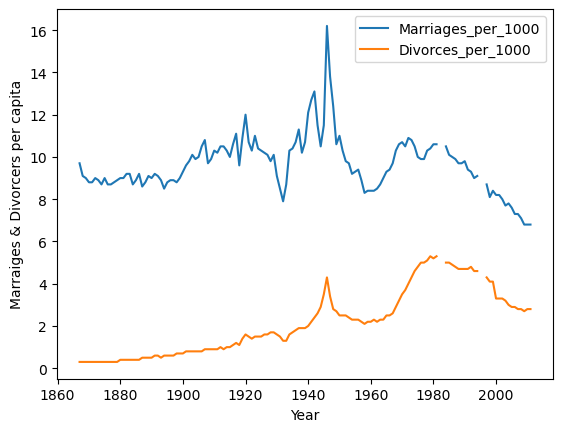

In [35]:
ax=us_mar_div.plot(x='Year',y=['Marriages_per_1000','Divorces_per_1000'])
ax.set_xlabel('Year')
ax.set_ylabel('Marraiges & Divorcers per capita')


## Question 7 

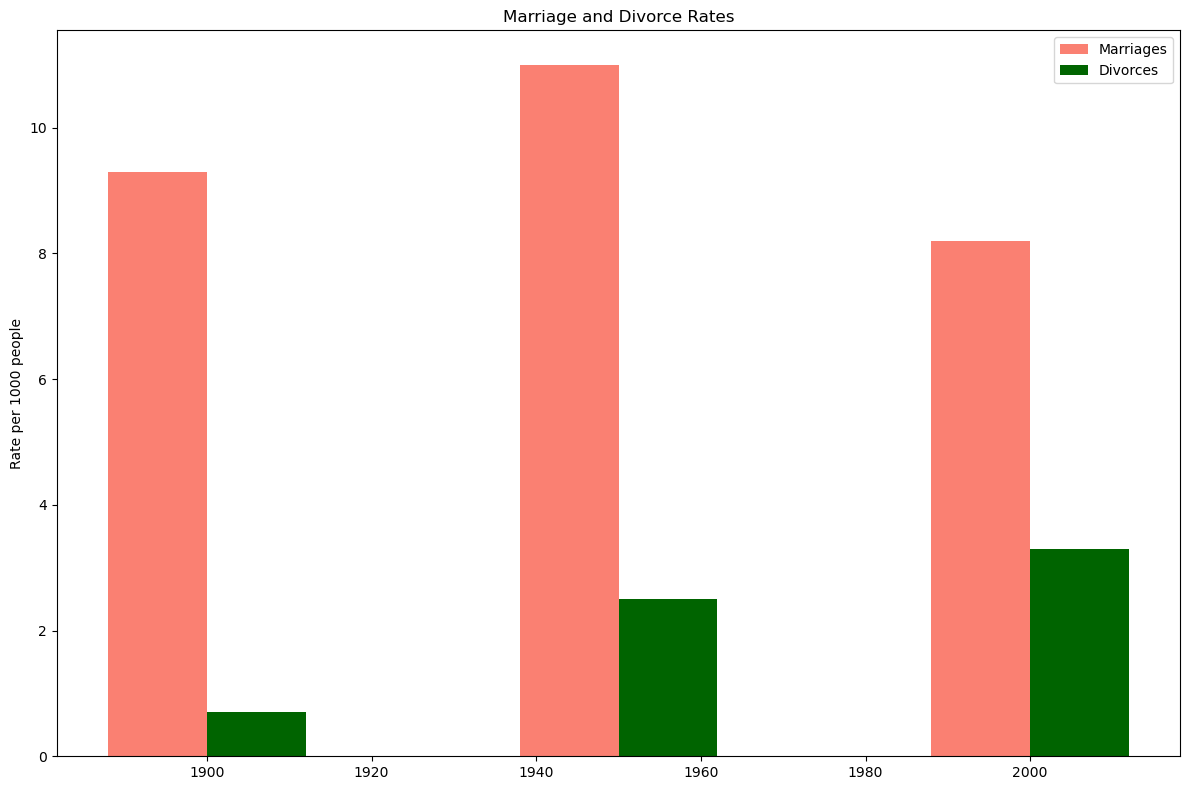

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
years = [1900, 1950, 2000]
data = data[data['Year'].isin(years)]

# Plot 
fig, ax = plt.subplots(figsize=(12, 8))


# Calculate bar width 
bar_width = 12

# Plot bars
ax.bar(data['Year'] - bar_width/2, data['Marriages_per_1000'],  
       width=bar_width, color='salmon', 
       label='Marriages')

ax.bar(data['Year'] + bar_width/2, data['Divorces_per_1000'], 
       width=bar_width, color='darkgreen',
       label='Divorces')
       
# Final touches       
ax.set_ylabel('Rate per 1000 people')
ax.set_title('Marriage and Divorce Rates')
ax.legend()
plt.tight_layout()
plt.savefig('rates.png', dpi=120)



## Question 8

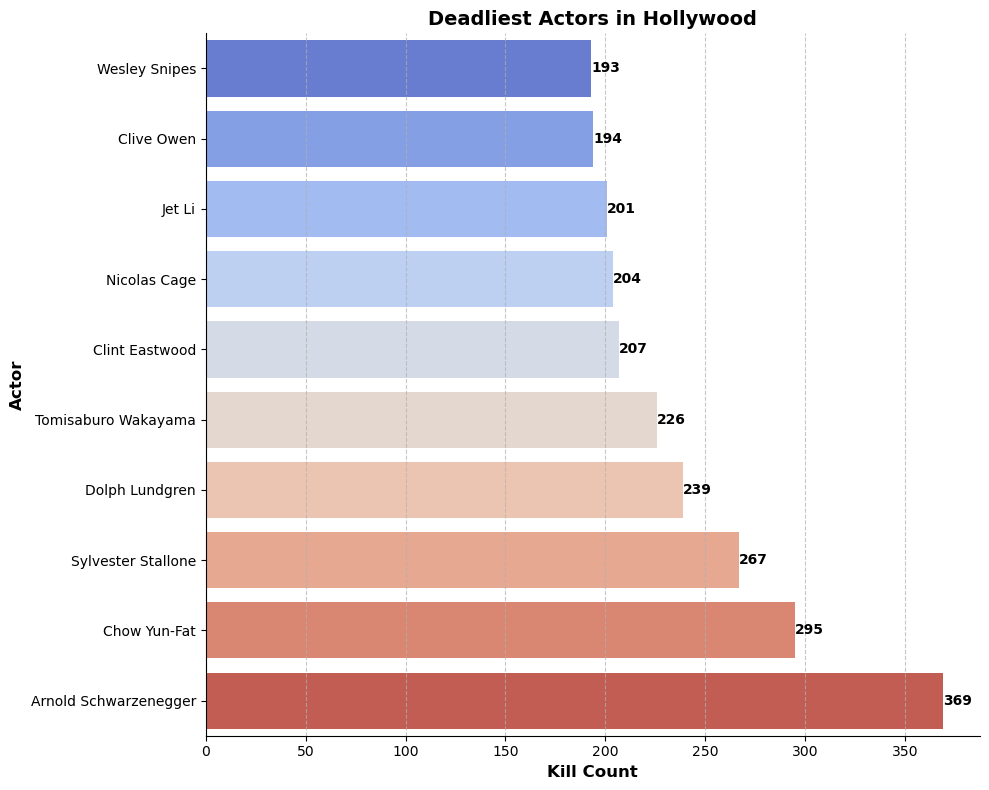

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "actor_kill_counts.csv"
data = pd.read_csv(file_path)

sorted_data = data.sort_values(by='Count', ascending=True)

custom_palette = sns.color_palette("coolwarm", n_colors=len(sorted_data))

plt.figure(figsize=(10, 8))  # Set the figure size
sns.barplot(x='Count', y='Actor', data=sorted_data, palette=custom_palette)

for index, value in enumerate(sorted_data['Count']):
    plt.text(value, index, f"{value:,}", ha='left', va='center', fontweight='bold', fontsize=10)

plt.xlabel('Kill Count', fontweight='bold', fontsize=12)  # X-axis label
plt.ylabel('Actor', fontweight='bold', fontsize=12)  # Y-axis label
plt.title('Deadliest Actors in Hollywood', fontweight='bold', fontsize=14) 

plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine() 

plt.tight_layout()
plt.show()


## Question 9

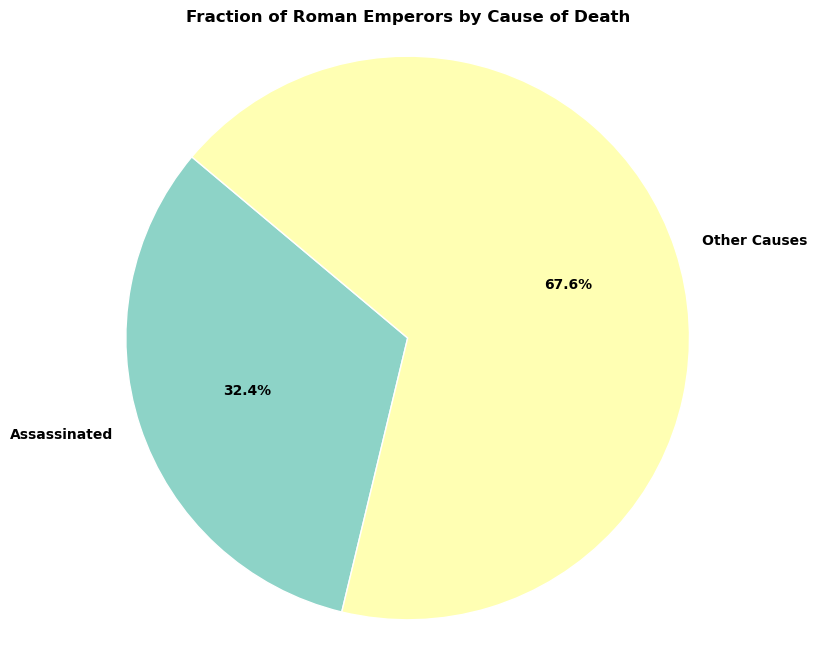

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']
total_emperors = len(data)
assassinated_count = len(assassinated_emperors)

percentage_assassinated = (assassinated_count / total_emperors) * 100

custom_palette = sns.color_palette("Set3", n_colors=2)

plt.figure(figsize=(8, 8))  # Set the figure size
plt.title('Fraction of Roman Emperors by Cause of Death', fontweight='bold')

plt.pie([assassinated_count, total_emperors - assassinated_count], 
        labels=['Assassinated', 'Other Causes'], colors=custom_palette,
        autopct='%1.1f%%', startangle=140, textprops={'weight': 'bold'},
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  

plt.axis('equal')

plt.show()


## Question 10

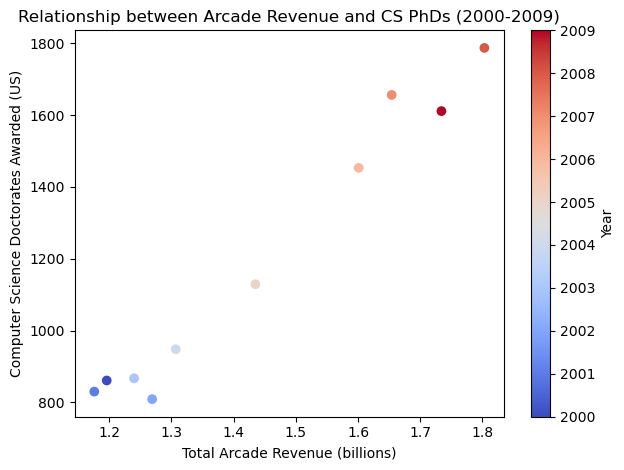

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r'arcade-revenue-vs-cs-doctorates.csv')

plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], c=data['Year'], cmap='coolwarm')

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title("Relationship between Arcade Revenue and CS PhDs (2000-2009)")

plt.colorbar().set_label('Year')

plt.tight_layout()
plt.show()